<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/CODE__Equalization_and_Histograms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equalization Step by Step vs OpenCV Function**

In this code, we compare the final equalizated image vs the result of function from OpenCV. The main idea is obtain normalized histogram and cumulative histograma from normal image and then, obtain equalization transform and also its histograms. Finally repeat the process since equalization transform and compare histograms and images.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# **PART 1: Step by Step Equalization**

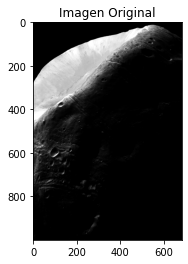

In [2]:
img = cv.imread('Fig0310(a).tif',0)    # 0 -> grayscale

plt.title('Imagen Original')
plt.imshow(img,'gray')
plt.show()

**Histogram** is a graphical representation of the distribution of data. 

**Normalized Histogram** is a histogram but values from 0 to 1 and the sum of all values is 1.

**Cumulative Histogram** is a histogram where every values is cumulated.

**Normalized Cumulative Histogram** is similar to cumulative histogram but values from 0 to 1 and the last value is equal to 1.

In [3]:
def histograms(img):
  # IMAGE HISTOGRAM
  hist, bins = np.histogram(img.flatten(), 256, [0, 256])
  # normalized histogram
  hist_norm = hist / hist.max()
  # cumulative histogram
  hist_cum = hist.cumsum()
  # normalized cumulative histogram
  hist_cum_norm = hist_cum / hist_cum.max()
  return hist_norm, hist_cum_norm

In [4]:
# Function recieve histogram and title to plot respective histogram

def hisplot(hist, title):
  
  plt.figure(figsize=(8,4))
  plt.title(title)
  plt.xlabel("Intensidad")
  plt.ylabel("Número de Pixeles")

  markerline, stemlines, baseline = plt.stem(
    hist, linefmt ='orange', markerfmt ='o',
    bottom = 0, use_line_collection = True)
  markerline.set_markerfacecolor('none')

  plt.xlim([0, 256])
  plt.show()

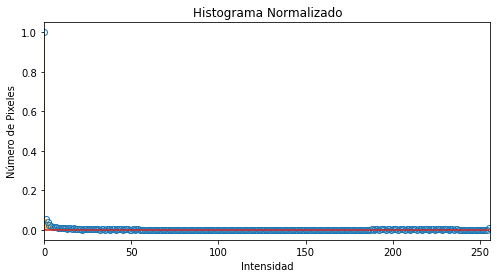

In [5]:
hist_norm, hist_cum_norm = histograms(img)
hisplot(hist_norm, 'Histograma Normalizado')

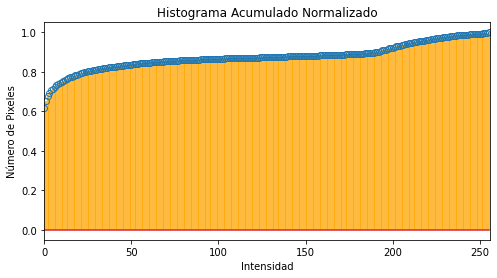

In [6]:
hisplot(hist_cum_norm, 'Histograma Acumulado Normalizado')

In [7]:
cdf_m = np.ma.masked_equal(hist_cum_norm, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img_equal = cdf[img]

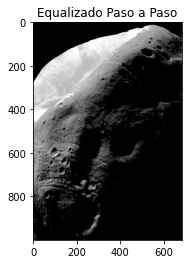

In [8]:
plt.title('Equalizado Paso a Paso')
plt.imshow(img_equal,'gray')
plt.show()

In [9]:
hist_norm_eq, hist_cum_norm_eq = histograms(img_equal)

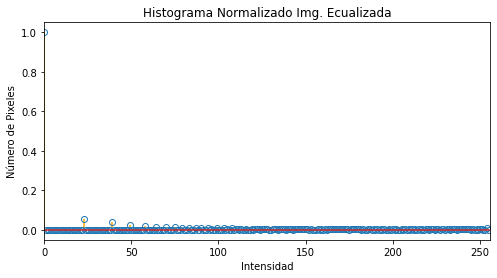

In [10]:
hisplot(hist_norm_eq, 'Histograma Normalizado Img. Ecualizada')

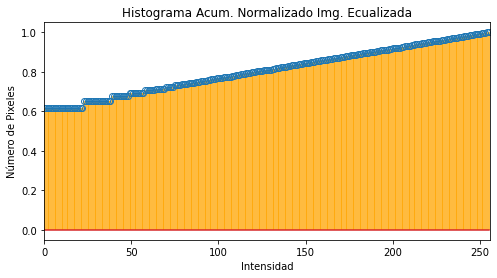

In [11]:
hisplot(hist_cum_norm_eq, 'Histograma Acum. Normalizado Img. Ecualizada')

# **PART 2: OpenCV Fuction**

In [12]:
# EQUALIZATION
equ = cv.equalizeHist(img)

# HISTOGRAMS
hist_norm_eq, hist_cum_norm_eq = histograms(img_equal)

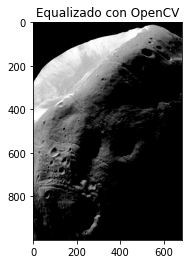

In [13]:
plt.title('Equalizado con OpenCV')
plt.imshow(equ,'gray')
plt.show()

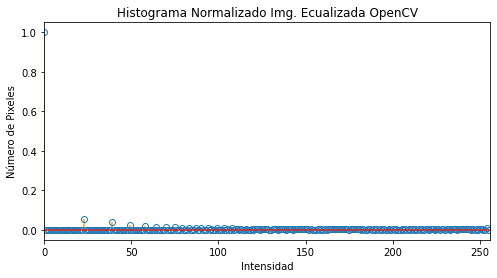

In [14]:
hisplot(hist_norm_eq, 'Histograma Normalizado Img. Ecualizada OpenCV')

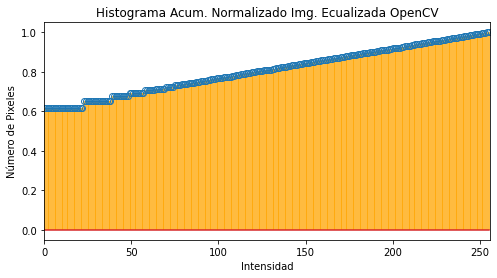

In [15]:
hisplot(hist_cum_norm_eq, 'Histograma Acum. Normalizado Img. Ecualizada OpenCV')